In [1]:
import pandas as pd

In [6]:
food_orders= pd.read_csv(r"data\food_orders_new_delhi.csv")
print(food_orders.head())

   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270         R2924  2024-02-01 01:11:52   
1         2       C1860         R2054  2024-02-02 22:11:04   
2         3       C6390         R2870  2024-01-31 05:54:35   
3         4       C6191         R2642  2024-01-16 22:52:49   
4         5       C6734         R2799  2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                  

In [7]:
print(food_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None


In [13]:
#Fill missing offers with 0
food_orders['Discounts and Offers'] = food_orders['Discounts and Offers'].fillna(0)

In [14]:
print(food_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None


Convert “Order Date and Time” and “Delivery Date and Time” to a datetime format.

In [15]:
from datetime import datetime

In [16]:
food_orders['Order Date and Time']= pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time']= pd.to_datetime(food_orders['Delivery Date and Time'])

Convert “Discounts and Offers” to a consistent numeric value (if applicable) or calculate the discount amounts and ensuring all monetary values are in a suitable format for calculations.

In [31]:
import re

def extract_discount(discount_str):
    try:
        discount_str = str(discount_str).lower()
        percent_match = re.search(r'(\d+(\.\d+)?)\s*%', discount_str)
        if percent_match:
            return float(percent_match.group(1))
        amount_match = re.search(r'(\d+(\.\d+)?)', discount_str)
        if amount_match:
            return float(amount_match.group(1))
        return 0.0
    except:
        return 0.0

In [33]:
#apply the function to create a new 'Discount Value' column
food_orders['Discount Percentage']= food_orders['Discounts and Offers'].apply(extract_discount)

# Compute Discount Amount
food_orders['Discount Amount'] = food_orders.apply(lambda x: x['Order Value'] * x['Discount Percentage'] / 100
              if '%' in str(x['Discounts and Offers']).lower()
              else x['Discount Percentage'],axis=1)

# Display results
print(food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head())
print(food_orders.dtypes)

   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                    0                  0.0             0.00
4         1992         50 off Promo                 50.0            50.00
Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

For the cost analysis, we’ll consider the following costs associated with each order:

1. Delivery Fee: The fee charged for delivering the order.

2. Payment Processing Fee: The fee for processing the payment.

3. Discount Amount: The discount provided on the order.

The revenue for the platform is mainly derived from the Commission Fee.

In [34]:
#calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

In [36]:
#aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()

In [37]:
overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit}

In [38]:
print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': np.int64(126990), 'Total Costs': np.float64(132741.84999999998), 'Total Profit': np.float64(-5751.85)}


Based on the analysis, here are the overall metrics for the food delivery operations:

Total Orders: 1,000

Total Revenue (from Commission Fees): 126,990 INR

Total Costs: 132,741.85 INR (including delivery fees, payment processing fees, and discounts)

Total Profit: -5,751.85 INR

It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

To better understand the distribution of costs, revenue, and profit, let’s plot:

1. A histogram of profits per order to visualize the distribution of profitable and unprofitable orders.
    
2. A pie chart to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts).
    
3. A bar chart to compare total revenue, total costs, and total profit

In [39]:
import matplotlib.pyplot as plt

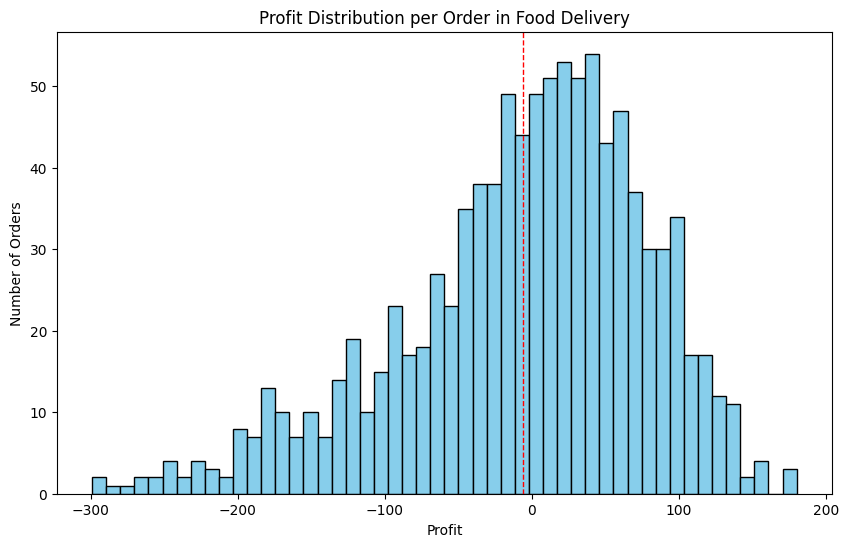

In [41]:
#histogram of profits per order
plt.figure(figsize=(10,6))
plt.hist(food_orders['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss (profits just below 0). The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.

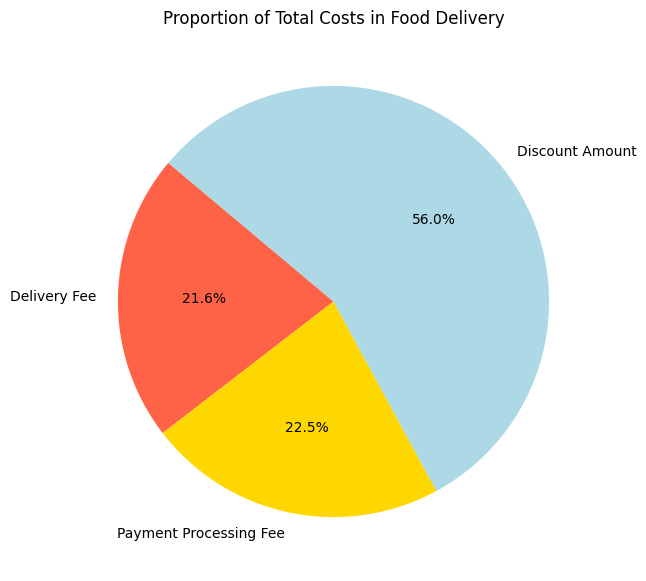

In [42]:
#pie chart for proportion of total costs
costs_breakdown= food_orders[['Delivery Fee','Payment Processing Fee','Discount Amount']].sum()
plt.figure(figsize=(7,7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold','lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

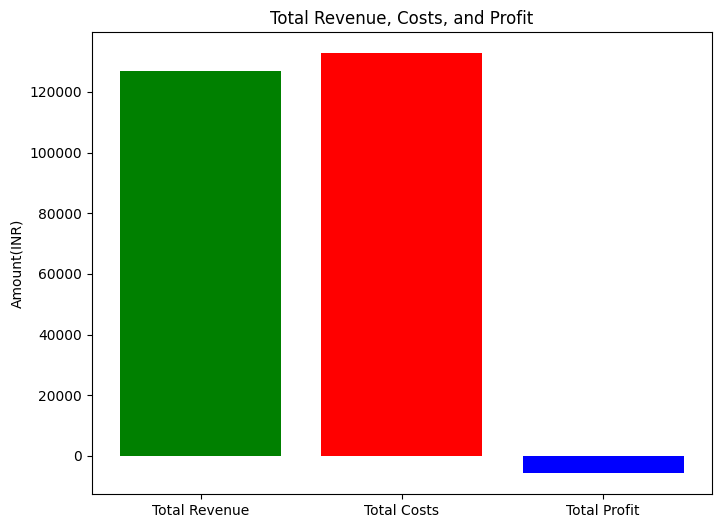

In [44]:
#bar chart for total revenue, costs, and profit
totals= ['Total Revenue', 'Total Costs', 'Total Profit']
values= [total_revenue, total_costs, total_profit]
plt.figure(figsize=(8,6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount(INR)')
plt.show()

It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a total loss.

From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. Specifically, we need to look for:

1. A new average commission percentage based on profitable orders.                                                                                                                                                                                                                                              
2. A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.

Given these new averages, we can suggest adjustments that might not only make individual orders profitable but also apply broadly across all orders to improve overall profitability. Let’s calculate:

1. The average commission percentage for profitable orders.

1. The average discount percentage for profitable orders.

In [48]:
#filter the dataset for profitable orders
profitable_orders= food_orders[food_orders['Profit']>0].copy()

#calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage']= (profitable_orders['Commission Fee'] / profitable_orders['Order Value'])*100

#calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

#calculate the new averages
new_avg_commission_percentage= profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage= profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)

27.706528082159736 5.623712042253798


New Average Commission Percentage: 27.70%

New Average Discount Percentage: 5.62%

In [54]:
# Commission percentage for all orders
overall_avg_commission_percentage = food_orders['Commission Percentage'].mean()

# Effective discount percentage for all orders
overall_avg_discount_percentage = food_orders['Effective Discount Percentage'].mean()

# Print all
print("Overall Average Commission:", overall_avg_commission_percentage)
print("Overall Average Discount:", overall_avg_discount_percentage)

Overall Average Commission: 19.750890168545332
Overall Average Discount: 7.6546113985795


The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability. The average discount percentage for profitable orders is notably lower than the overall average, indicating that lower discounts might contribute to profitability without significantly deterring order volume.

Now, let’s visualize a comparison of profitability using actual versus recommended discounts and commissions across all orders. For this, we need to:

1. Calculate the profitability per order using the actual discounts and commissions already present in the dataset.

2. Simulate profitability per order using the recommended discounts (5.62%) and commissions (27.70%) to see the potential impact on profitability.

This comparison will help illustrate the potential impact of adopting the recommended discount and commission rates on the overall profitability of orders.

In [56]:
#simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 27.70  # 27.70%
recommended_discount_percentage = 5.62    # 5.62%

#calculate the simulated commission fee and discount amount using recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission_percentage / 100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount_percentage / 100)

#recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee'] +
                                        food_orders['Payment Processing Fee'] +
                                        food_orders['Simulated Discount Amount'])

food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee'] -
                                   food_orders['Simulated Total Costs'])

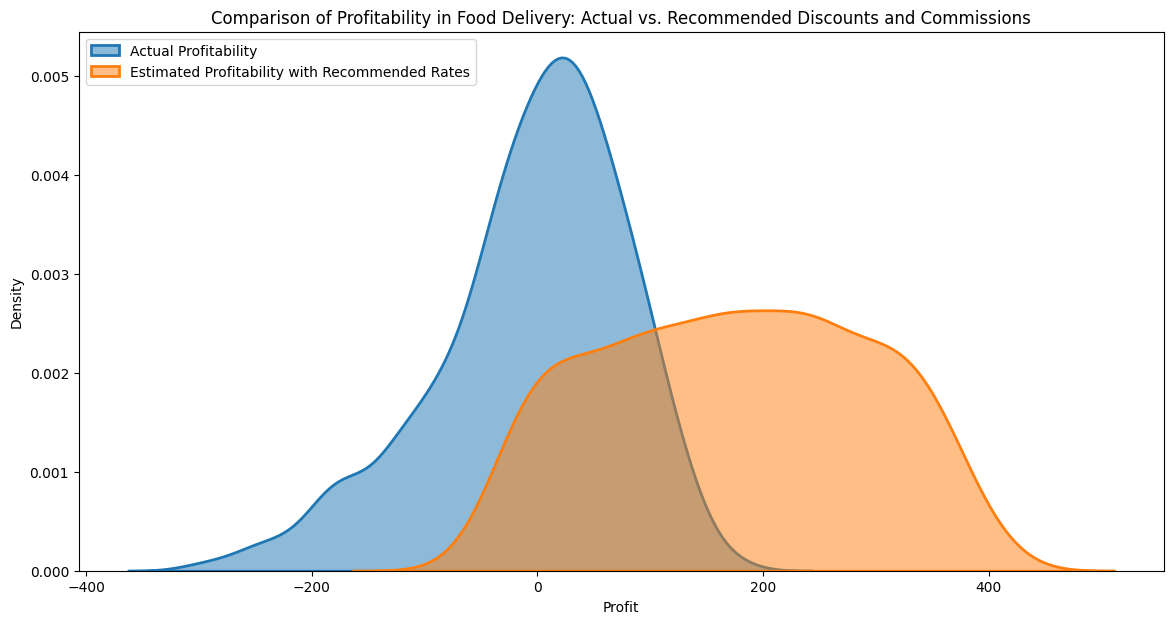

In [57]:
#visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(food_orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(food_orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

The visualization compares the distribution of profitability per order using actual discounts and commissions versus the simulated scenario with recommended discounts (5.62%) and commissions (27.70%).

The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses (profit < 0) and a broad spread of profit levels for orders. The simulated scenario suggests a shift towards higher profitability per order. The distribution is more skewed towards positive profit, indicating that the recommended adjustments could lead to a higher proportion of profitable orders.